# NAC3 - Aprendizado de maquina

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Gabriel Borowiec Marciano | RM 81779       | 4SIA    |
| Gabriel Juncken Costa     | RM 82460       | 4SIA    |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `** dia 11/09 (domingo) **`

`O grupo deve responder ao Google forms` : [https://forms.gle/EEYUkZiWcJ6Xduah6](https://forms.gle/EEYUkZiWcJ6Xduah6)


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 1 ponto)
- R4: Treinamento e Teste do Modelo (Até 2 ponto)
- R5: Validação e Otimização do Modelo (Até 3 ponto)
- R6: Conclusões Finais (Até 1 ponto)
- R7: Deploy (Até 2 pontos *extra) 

Nota_final = R1 + R2 + R3 + R4 + R5 + R6 + R7


``Siga todas as instruções deste noteboook, mas não limite suas análises apenas ao conteúdo visto em aula.``


Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código de resposta.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.

**Respeite a rubrica e não responda fora de ordem ou sequência**



## Análise preditiva de doeça cardíaca em pacientes

![](coracao.jpg)



Vamos trabalhar com um CONJUNTO DE DADOS DE DOENÇA CARDÍACA afim de ``predizer a presença ou não de doenças do coração em pacientes``.    

[dataset: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive).


## 1. Exploração de Dados

Carregue o dataset e faça uma visualização das primeiras linhas (identificação básica apenas confirmar se a base foi carregada corretamente).


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [4]:
#Seu Código aqui...
df = pd.read_csv('heart_statlog_cleveland_hungary_final2.csv')

df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


**Pergunta:** Apresente (Escreva) uma descrição dos atributos (colunas) e seu significado:

Exemplo: 

- id: Representa o fabricante
- fuel_type: tipo de combustível (pode ser Gasolina ou Disel)
- price: Representa o valor do carro (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

* Age: Idade da pessoa em anos.
* Sex: Sexo da pessoa.
* Chest Pain Type: Tipo da dor no peito.
* Resting bp s: Pressão arterial.
* cholesterol: Colesterol no sangue da pessoa.
* fasting blood sugar: Açúcar acima de 120 mg, descrito na forma de um booleano 
* resting ecg: Normal, tem anormalidade e tem hipertrofia pelos critérios de Estes.
* max heart rate: Frequência cardíaca máxima atingida
* exercise angina: a pessoa realiza ou não exercícios cardio vasculares
* oldpeak: Encontro no eletrocardiograma em que o traço está anormalmente abaixo da linha de base.
* ST slope: presença de inclinação do Segmento ST.
* Class: Indica se apresenta doença de coração ou não.

### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos para compreeder a natureza do problema.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only
  


<Figure size 72x72 with 0 Axes>

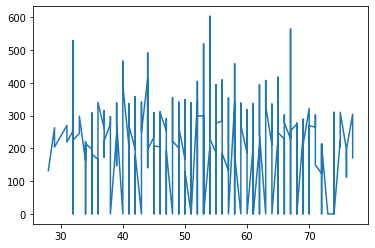

Açucar acima de 120 em homens: 217
Açucar acima de 120 em mulheres: 973


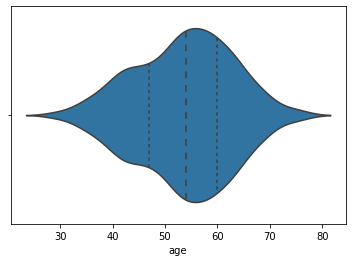

Doença cardíaca em homens: 559
Doença cardíaca em mulheres: 631


In [5]:
labelencoder = LabelEncoder()

dfClasse = df.copy()
dfClasse['class'] = labelencoder.fit_transform(df['class'])

dfIdade = df.sort_values('age', 0, True)

nivelAcucarMasc = 0
nivelAcucarFem = 0

for index, row in df.iterrows():
    if row['sex'] == 'male' and row['fasting blood sugar'] != 0:
        nivelAcucarMasc = nivelAcucarMasc + 1
    else:
        nivelAcucarFem = nivelAcucarFem + 1

DoencaMasc = 0
DoencaFem = 0
for index, row in dfClasse.iterrows():
    if row['sex'] == 'male' and row['class'] != 0:
        DoencaMasc = DoencaMasc + 1
    else:
        DoencaFem = DoencaFem + 1

plt.figure(figsize=(1, 1))
figure, axis = plt.subplots(1, 1)
axis.plot(dfIdade['age'], dfIdade['cholesterol'])
plt.show()

print('Açucar acima de 120 em homens: ' + str(nivelAcucarMasc))
print('Açucar acima de 120 em mulheres: ' + str(nivelAcucarFem))

g = sns.violinplot(x='age', data=dfIdade, inner='quartile')
plt.show()

print('Doença cardíaca em homens: ' + str(DoencaMasc))
print('Doença cardíaca em mulheres: ' + str(DoencaFem))

**Perguntas:** 

1. Qual a relação entre a idade e colesterol?
2. O indice açucar no sangue > 120 mg/dl é mais frequênte em homens ou mulheres?
3. Qual a distribuição de idade do dataset?
4. Pessoas com presença de doença cardiaca são em sua maioria do grupo masculino ou feminino? 

**Respostas:**

1. Após a análise, os dados de idade e colesterol não se relacionam.
2. A partir dos dados analisados percebemos que o sexo com maior indice de açúcar são as mulheres.
3. Com o auxílio do gráfico violino, é possível afirmar que a maior quantidade de possas dentro da base estão entre 45 e 60 anos.
4. A partir da analises, percebemos que doenças cardíacas ocorrem mais em mulheres do que em homens.

## 2. Preparação dos Dados

**Lembre-se:** Trate esses dados dentro do contexto do problema. ``Justifique suas escolhas``.

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  1190 non-null   int64 
 1   sex                  1190 non-null   object
 2   chest pain type      1190 non-null   int64 
 3   resting bp s         1190 non-null   int64 
 4   cholesterol          1190 non-null   int64 
 5   fasting blood sugar  1190 non-null   int64 
 6   resting ecg          1190 non-null   int64 
 7   max heart rate       1190 non-null   int64 
 8   exercise angina      1190 non-null   object
 9   oldpeak              1190 non-null   int64 
 10  ST slope             1190 non-null   int64 
 11  class                1190 non-null   object
dtypes: int64(9), object(3)
memory usage: 111.7+ KB


**Pergunta:** Foram localizados dados ausente, dados nulos e dados iguais a 0(zero)? Se existe, como foram tratados (removidos ou mantidos ou substituidos ou ....)? 

**Resposta:**

Não há dados faltando, e os zeros foram mantidos.

### Análise de Outliers

Faça a análise de outliers.

In [7]:
dfNumeros = df[['age', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'oldpeak', 'ST slope', 'class']]
dfNumeros['class'] = labelencoder.fit_transform(df['class'])
z = np.abs(stats.zscore(dfNumeros))

df = df[(z < 3).all(axis=1)]

df.shape
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,male,2,140,289,0,0,172,no,0,1,Normal
1,49,female,3,160,180,0,0,156,no,10,2,heart disease
2,37,male,2,130,283,0,1,98,no,0,1,Normal
3,48,female,4,138,214,0,0,108,yes,15,2,heart disease
4,54,male,3,150,195,0,0,122,no,0,1,Normal


**Pergunta:** Foram localizados outliers? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**
Todos os outiliers foram removidos.

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos categoricos, se existir. Manipule de forma conveniente para ser interpretado como um dado numérico.

In [8]:
df['class'] = labelencoder.fit_transform(df['class'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['exercise angina'] = labelencoder.fit_transform(df['exercise angina'])

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,1,2,140,289,0,0,172,0,0,1,0
1,49,0,3,160,180,0,0,156,0,10,2,1
2,37,1,2,130,283,0,1,98,0,0,1,0
3,48,0,4,138,214,0,0,108,1,15,2,1
4,54,1,3,150,195,0,0,122,0,0,1,0


**Pergunta:** Quais são os atributos categoricos? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**
"class", "sex", "exercise angina". Label Encoderer.

### Normalização dos dados

Faça a manipulação adequada para normalizar os dados, se necessário.

In [9]:
cols = ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(df[cols])

df[cols] = scaled_data

df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,class
0,40,1,2,0.571429,0.588595,0,0,0.788732,0,0.333333,1,0
1,49,0,3,0.761905,0.366599,0,0,0.676056,0,0.500000,2,1
2,37,1,2,0.476190,0.576375,0,1,0.267606,0,0.333333,1,0
3,48,0,4,0.552381,0.435845,0,0,0.338028,1,0.583333,2,1
4,54,1,3,0.666667,0.397149,0,0,0.436620,0,0.333333,1,0


**Pergunta:** Os dados foram normalizados? Qual foi a técnica de preprocessamento utilizada? 

**Resposta:**
Os dados foram normalizados pelo processo de MinMaxScaler.

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [ ] Regressão
    [X] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos de ML para ser testado.

**Resposta:**

1. algoritimo 1 ... de classificação
2. algoritimo 2 ... de progressão linear
3. algoritimo 3 ... Perceptron


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. algoritimo 1 ... determina grupos baseados suas características e determina a qual grupo cada um pertence
2. algoritimo 2 ... cria uma fórmula para previsão de valores
3. algoritimo 3 ... cria neurônios artificiais que criam regras baseadas nas semelhanças de seus dados

### Dataset dos dados tratados 

Crie um subset dos dados apenas com os atributos que serão utilizados e exiba as primeiras linhas.

In [10]:
dfSub = df[['age', 'chest pain type', 'resting bp s', 'resting ecg', 'max heart rate', 'oldpeak', 'ST slope', 'class']]

dfSub.head()

,age,chest pain type,resting bp s,resting ecg,max heart rate,oldpeak,ST slope,class
0,40,2,0.571429,0,0.788732,0.333333,1,0
1,49,3,0.761905,0,0.676056,0.500000,2,1
2,37,2,0.476190,1,0.267606,0.333333,1,0
3,48,4,0.552381,0,0.338028,0.583333,2,1
4,54,3,0.666667,0,0.436620,0.333333,1,0


### Definição de X e Y

Separe os subsets dos atributos em Y e X :

- Y = atributo dependente (alvo)
- X = Atributo independente (entradas)

In [11]:
X = dfSub[['age', 'chest pain type', 'resting bp s', 'resting ecg', 'max heart rate', 'oldpeak', 'ST slope']]
Y = dfSub['class']

### Divisão em treino e teste.

Faça o split do dados para treinamento e teste

In [12]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

## 4. Treinamento e teste do modelo

Defina a métrica de performance para avaliação dos modelos de ML

**Resposta:**
Um mínimo de 80% de acerto

### Treinamento e teste

Faça o treinamento e teste de dos 3 algoritmos escolhidos, aplique no treinamento a validação cruzada para um kfold de 5.

### Algoritmo 1

In [13]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_treino, Y_treino)

pred = model.predict(X_teste)
predT = model.predict(X_treino)

print("Acerto médio de classificação do teste: ", accuracy_score(Y_teste, pred))
print("Acerto médio de classificação do treino: ", accuracy_score(Y_treino, predT))

Acerto médio de classificação do teste:  0.8138528138528138
Acerto médio de classificação do treino:  0.8492407809110629


### Algoritmo 2

In [14]:
lin_model = LinearRegression()

lin_model.fit(X_treino, Y_treino)

pred = lin_model.predict(X_teste)
predT = lin_model.predict(X_treino)

i = 0
for a in pred:
    if a >= 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
    i = i + 1

i = 0
for a in predT:
    if a >= 0.5:
        predT[i] = 1
    else:
        predT[i] = 0
    i = i + 1

print("R2-score do teste: %.2f" % r2_score(pred , Y_teste) )
print("R2-score do treino: %.2f" % r2_score(predT , Y_treino) )


R2-score do teste: 0.22
R2-score do treino: 0.18


### Algoritmo 3

In [15]:
model = keras.Sequential([
    layers.Dense(units=4, input_shape=[7]),
    layers.Dense(units=4),
    layers.Dense(units=4),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss = 'mse')

epochs_hist = model.fit(X_treino, Y_treino, epochs=25)

Epoch 1/25
29/29 [==============================] - 1s 2ms/step - loss: 9816.5039
Epoch 2/25
29/29 [==============================] - 0s 1ms/step - loss: 130.5630
Epoch 3/25
29/29 [==============================] - 0s 2ms/step - loss: 2.9048
Epoch 4/25
29/29 [==============================] - 0s 1ms/step - loss: 0.7724
Epoch 5/25
29/29 [==============================] - 0s 2ms/step - loss: 0.5159
Epoch 6/25
29/29 [==============================] - 0s 1ms/step - loss: 0.4625
Epoch 7/25
29/29 [==============================] - 0s 1ms/step - loss: 0.4312
Epoch 8/25
29/29 [==============================] - 0s 1ms/step - loss: 0.3922
Epoch 9/25
29/29 [==============================] - 0s 1ms/step - loss: 0.3743
Epoch 10/25
29/29 [==============================] - 0s 1ms/step - loss: 0.3366
Epoch 11/25
29/29 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 12/25
29/29 [==============================] - 0s 2ms/step - loss: 0.3395
Epoch 13/25
29/29 [=========================

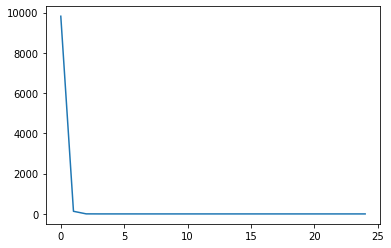

In [16]:
history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();

In [17]:
pred = model.predict([X_treino])

i = 0
for a in pred:
    if a >= 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
    i = i + 1

acuracia = 0
j = 0
for i, v in Y_treino.items():
    if pred[j] == v:
        acuracia += 1
    j = j + 1

print(acuracia/len(Y_treino))

0.6811279826464208


In [18]:
pred = model.predict([X_teste])

i = 0
for a in pred:
    if a >= 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
    i = i + 1

acuracia = 0
j = 0
for i, v in Y_teste.items():
    if pred[j] == v:
        acuracia += 1
    j = j + 1

print(acuracia/len(Y_teste))

0.696969696969697


Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      84%           |      16%                       |   79%              |
| teste  |      76%            |      35%                       |   83%              |


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** O algoritmo 1 teve uma performace boa.

O algoritmo 2 teve uma performace ruim.

O algoritmo 3 teve uma performace boa.

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize uma das técinicas: **RandomSearchCV** ou **GridSearchCV**.


Após a otimização dos parametros, treine novamente os 3 algoritmos de ML  utilizando os parametos de otimização e compares seus resultados.


**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:** A técninca escolhida foi a de GridSearchCV, pois ela é a melhor com aprendizado supervisionado, levando também em conta que nossa database é pequena demais para nos beneficiarmos de todas as qualidades de RandomSearchCV.

In [19]:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9]}]
         
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_treino, Y_treino)
gs_knn.best_params_

{'knn__n_neighbors': 5}

### Algoritmo 1

In [20]:
k = 7
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_treino, Y_treino)

predicao = model.predict(X_teste)
predicaoTreino = model.predict(X_treino)

print("Acerto médio de classificação do teste: ", accuracy_score(Y_teste, predicao))
print("Acerto médio de classificação do treino: ", accuracy_score(Y_treino, predicaoTreino))

Acerto médio de classificação do teste:  0.8354978354978355
Acerto médio de classificação do treino:  0.8503253796095445


### Algoritmo 2

In [21]:
lin_model = LinearRegression()

lin_model.fit(X_treino, Y_treino)

predicao = lin_model.predict(X_teste)
predicaoTreino = lin_model.predict(X_treino)

i = 0
for a in predicao:
    if a >= 0.5:
        predicao[i] = 1
    else:
        predicao[i] = 0
    i = i + 1

i = 0
for a in predicaoTreino:
    if a >= 0.5:
        predicaoTreino[i] = 1
    else:
        predicaoTreino[i] = 0
    i = i + 1

print("R2-score do teste: %.2f" % r2_score(predicao , Y_teste) )
print("R2-score do treino: %.2f" % r2_score(predicaoTreino , Y_treino) )


R2-score do teste: 0.22
R2-score do treino: 0.18


### Algoritmo 3

In [22]:
modelo = keras.Sequential([
    layers.Dense(units=4, input_shape=[7]),
    layers.Dense(units=3),
    layers.Dense(units=1)
])

modelo.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss = 'mse')

epochs_hist = modelo.fit(X_treino, Y_treino, epochs=25)

Epoch 1/25
29/29 [==============================] - 1s 1ms/step - loss: 692.9071
Epoch 2/25
29/29 [==============================] - 0s 1ms/step - loss: 10.3232
Epoch 3/25
29/29 [==============================] - 0s 1ms/step - loss: 0.8054
Epoch 4/25
29/29 [==============================] - 0s 1ms/step - loss: 0.2656
Epoch 5/25
29/29 [==============================] - 0s 2ms/step - loss: 0.2386
Epoch 6/25
29/29 [==============================] - 0s 1ms/step - loss: 0.2350
Epoch 7/25
29/29 [==============================] - 0s 1ms/step - loss: 0.2246
Epoch 8/25
29/29 [==============================] - 0s 1ms/step - loss: 0.2188
Epoch 9/25
29/29 [==============================] - 0s 1ms/step - loss: 0.2208
Epoch 10/25
29/29 [==============================] - 0s 1ms/step - loss: 0.2166
Epoch 11/25
29/29 [==============================] - 0s 1ms/step - loss: 0.2117
Epoch 12/25
29/29 [==============================] - 0s 1ms/step - loss: 0.2073
Epoch 13/25
29/29 [===========================

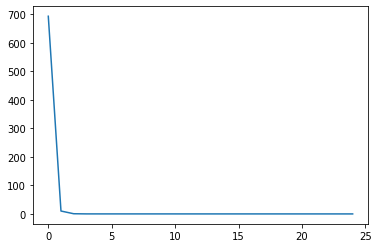

In [23]:
history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();

In [24]:
predicao = modelo.predict([X_treino])

i = 0
for a in predicao:
    if a >= 0.5:
        predicao[i] = 1
    else:
        predicao[i] = 0
    i = i + 1

acerto = 0
j = 0
for i, v in Y_treino.items():
    if predicao[j] == v:
        acerto += 1
    j = j + 1

print(acerto/len(Y_treino))

0.7754880694143167


In [25]:
predicao = modelo.predict([X_teste])

i = 0
for a in predicao:
    if a >= 0.5:
        predicao[i] = 1
    else:
        predicao[i] = 0
    i = i + 1

acerto = 0
j = 0
for i, v in Y_teste.items():
    if predicao[j] == v:
        acerto += 1
    j = j + 1

print(acerto/len(Y_teste))

0.8181818181818182


Sumarize na tabela abaixo os resultados obtidos dos modelos de ML para o conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      81%           |      16%                       |   66%              |
| teste  |      76%            |      35%                       |   69%              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais características deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** Os algorítmos tiveram um desempenho igual ao visto ateriormente.

## Salvando o modelo desenvolvido

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente e salve

```python
# exemplo de como salvar o modelo "model" no arquivo "modelsave.pkl"

# import lib
import pickle

# salvar
with open('modelsave.pkl', 'wb') as file:
    pickle.dump(model, file)

```

In [26]:
import pickle

# salvar
with open('modelsave.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('modelsave2.pkl', 'wb') as file:
    pickle.dump(modelo, file)

## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: 

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: 

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: 

## 7. Deploy 

Etapa bonûs (Até 2 pontos *extra)

Essa parte não é obrigatória, por esse motivo é considerada pontuação extra na nota para quem desenvolver.


Faça o deploy do modelo de ML desenvolvido em um webserver. Como sugestão utilize Flask ou FastAPI ou Django. Procure por referências na web.